# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
cc_trades = ta.get_coincheck_trades_df()
lq_trades = ta.get_liquid_trades_df()

In [8]:
len(cc_trades), len(lq_trades)

(164, 164)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               74587 |
+---------------------+---------------------+
|            取引回数 |                 164 |
+---------------------+---------------------+
|            開始日時 | 2020-03-30 00:39:55 |
+---------------------+---------------------+
|            終了日時 | 2020-03-30 22:35:39 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 21:55:44 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+----------+
| 開始[JPY]   |    10524 |
+-------------+----------+
| 終了[JPY]   |    10759 |
+-------------+----------+
| 利益[JPY]   |      235 |
+-------------+----------+
| 開始[BTC]   | 0.022006 |
+-------------+----------+
| 終了[B

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,cc_side,cc_price,lq_side,lq_price,profit
timestamp,,,,,
2020-03-30 17:19:14,sell,4082.826,buy,4082.928,-0.102
2020-03-30 17:19:33,buy,4074.993,sell,4074.786,-0.207
2020-03-30 17:43:13,buy,4081.995,sell,4087.086,5.091
2020-03-30 17:45:31,sell,4083.480,buy,4085.574,-2.094
2020-03-30 19:10:38,buy,4072.995,sell,4076.298,3.303
2020-03-30 19:39:04,sell,4104.468,buy,4109.292,-4.824
2020-03-30 19:40:04,buy,4095.994,sell,4099.896,3.902
2020-03-30 19:41:21,sell,4098.000,buy,4100.970,-2.970
2020-03-30 19:48:19,buy,4111.997,sell,4117.854,5.857


In [12]:
round(sum(profit_df.profit), 3)

235.953

## トレードグラフ

In [13]:
cc_ticks = ta.get_coincheck_ticks_df()
lq_ticks = ta.get_liquid_ticks_df()

In [14]:
len(cc_ticks), len(lq_ticks)

(74587, 74587)

In [15]:
cc_bids = cc_ticks['bid']
cc_asks = cc_ticks['ask']
lq_bids = lq_ticks['bid']
lq_asks = lq_ticks['ask']

fig1, ax1 = ta.get_fig(cc_bids, lq_asks)
fig2, ax2 = ta.get_fig(lq_bids, cc_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

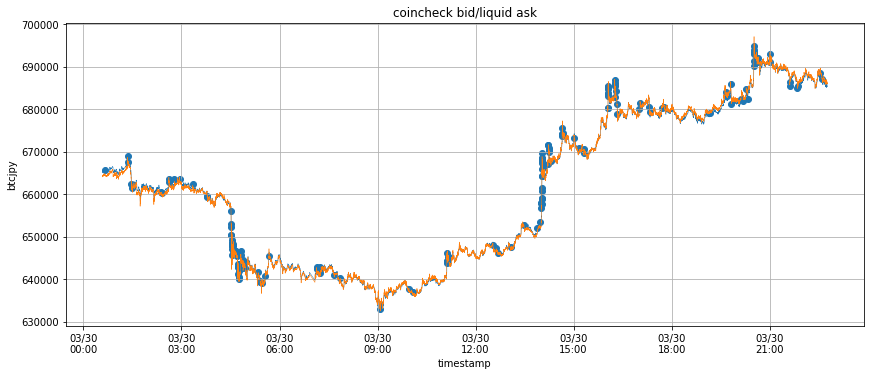

In [16]:
fig1

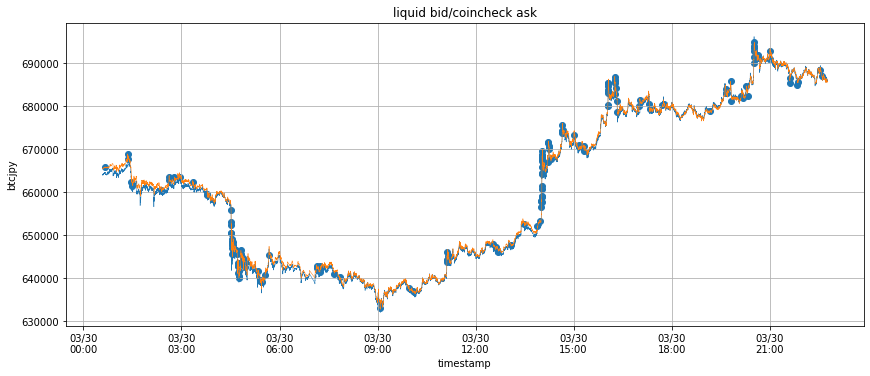

In [17]:
fig2